# Look at the himawari-8 AHI raw data from NCI

From Kurihara et al., 2016: IR bands centered at 3.9, 8.6, 10.4, 11.2, and 12.4 μm

8.6 um = Band 11
10.4 = Band 13


NCI opendap data catalog example:

http://dapds00.nci.org.au/thredds/rr5/satellite/obs/himawari8/FLDK/2020/02/07/0400/catalog.html

In [55]:
!pip install --user xarray netcdf4 h5netcdf

^C
Traceback (most recent call last):
  File "/cvmfs/sft.cern.ch/lcg/views/LCG_97python3/x86_64-centos7-gcc8-opt/bin/pip", line 11, in <module>
    load_entry_point('pip==19.1.1', 'console_scripts', 'pip')()
  File "/cvmfs/sft.cern.ch/lcg/views/LCG_97python3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/pip/_internal/__init__.py", line 78, in main
    return command.main(cmd_args)
  File "/cvmfs/sft.cern.ch/lcg/views/LCG_97python3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/pip/_internal/cli/base_command.py", line 230, in main
    pip_version_check(session, options)
  File "/cvmfs/sft.cern.ch/lcg/views/LCG_97python3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/pip/_internal/utils/outdated.py", line 102, in pip_version_check


In [31]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyproj import Proj

In [17]:
# Example file
#'http://dapds00.nci.org.au/thredds/dodsC/rr5/satellite/obs/hpyprojari8/FLDK/2020/05/31/0100/20200531010000-P1S-ABOM_OBS_B13-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'
ncipath = 'http://dapds00.nci.org.au/thredds/dodsC/rr5/satellite/obs/himawari8/FLDK/'
yyyy='2020'
mm='06'
dd='14'
hhmm='1400'

band = 14

hstr = '00-P1S-ABOM_OBS_B{}-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'.format(band)

timestr = '{}/{}/{}/{}/{}{}{}{}{}'.format(yyyy,mm,dd,hhmm,yyyy,mm,dd,hhmm,hstr)
fullurl = '{}{}'.format(ncipath,timestr)

fullurl


'http://dapds00.nci.org.au/thredds/dodsC/rr5/satellite/obs/himawari8/FLDK/2020/06/14/1400/20200614140000-P1S-ABOM_OBS_B14-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'

In [18]:
ds = xr.open_dataset(fullurl)
ds

<xarray.Dataset>
Dimensions:                              (time: 1, x: 5500, y: 5500)
Coordinates:
  * time                                 (time) datetime64[ns] 2020-06-14T14:00:00
  * y                                    (y) float64 5.499e+06 ... -5.499e+06
  * x                                    (x) float64 -5.499e+06 ... 5.499e+06
Data variables:
    geostationary                        float32 ...
    scan_line_time                       (y) datetime64[ns] ...
    channel_0014_brightness_temperature  (time, y, x) float32 ...
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    acknowledgment:                  See disclaimer
    cdm_data_type:                   grid
    comment:                         AGLS observations geometry product
    contributor_name:                Commonwealth of Australia, Bureau of Met...
    contributor_role:                Development; Operations
    creator_email:                   sat_support@bom.gov.au
    creator_name:                    Commonwealth of Australia, Bureau of Met...
    creator_url:                     http://www.bom.gov.au/satellite/
    disclaimer:                      You have requested that the Bureau of Me...
    geospatial_lat_resolution:       0.02
    geospatial_lat_units:            degree_north
    geospatial_lon_resolution:       0.02
    geospatial_lon_units:            degree_east
    geospatial_vertical_max:         0
    geospatial_vertical_min:         0
    geospatial_vertical_positive:    up
    geospatial_vertical_resolution:  0
    geospatial_vertical_units:       m
    institution:                     ABOM
    instrument:                      AHI
    keywords:                        EARTH SCIENCE
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    license:                         See disclaimer
    naming_authority:                au.gov.bom
    processing_level:                L2
    product_specification:           AGLS-OBS_data-product-specification_rev0...
    product_suite:                   OBS_B14
    project:                         AGLS
    publisher_email:                 sat_support@bom.gov.au
    publisher_name:                  Commonwealth of Australia, Bureau of Met...
    publisher_url:                   http://www.bom.gov.au/satellite/
    references:                      AGLS observations product
    standard_name_vocabulary:        CF-1.6
    summary:                         AGLS observations product
    time_coverage_duration:          P1S
    time_coverage_resolution:        P1S
    title:                           AGLS observations product suite
    wmo_instrument_name:             Advanced Himawari Imager
    wmo_instrument_type:             297
    wmo_satellite_series:            273
    date_created:                    20200614T140002Z
    history:                         saturnc
    id:                              ABOM_AGLS_OBS_B14_P1S_GRID_v1.1
    netCDF_version:                  4.3.3.1 of Dec 10 2015 16:44:18 $
    processing_version:              1.1
    uuid:                            e0abe26d-71c5-40fc-8f31-3f0795a97d3d
    geospatial_lat_max:              81.13851
    geospatial_lat_min:              -81.13851
    geospatial_lon_max:              221.89696
    geospatial_lon_min:              59.50304
    platform:                        Himawari-8
    platform_launch_date:            20141007T051600Z
    time_coverage_end:               20200614T140939Z
    time_coverage_start:             20200614T140020Z
    wmo_platform_name:               Himawari-8
    wmo_satellite_number:            173

In [19]:
# Get the Projection
P = Proj(ds.geostationary.proj4, init=None)

lon,lat = P(ds.x.values, ds.y.values, inverse=True)
lon[lon>1e10] = np.nan
lat[lat>1e10] = np.nan

x1,x2 = 120,125
y1,y2 = -16,-12
i1 = np.argwhere(lon>x1)[0,0]
i2 = np.argwhere(lon>x2)[0,0]
j1 = np.argwhere(lat<y1)[0,0]
j2 = np.argwhere(lat<y2)[0,0]

x = lon[i1:i2]
y = lat[j2:j1]

i1,i2,j1,j2

/usr/local/bin/start_ipykernel.py:10: RuntimeWarning: invalid value encountered in greater
/usr/local/bin/start_ipykernel.py:11: RuntimeWarning: invalid value encountered in greater
/usr/local/bin/start_ipykernel.py:12: RuntimeWarning: invalid value encountered in less
/usr/local/bin/start_ipykernel.py:13: RuntimeWarning: invalid value encountered in less


(1711, 1928, 3610, 3403)

In [20]:
#mydata = ds['channel_00{}_brightness_temperature'.format(band)][:,j2:j1,i1:i2]- 273.15
myvar = ds['channel_00{}_brightness_temperature'.format(band)]
myvar

<xarray.DataArray 'channel_0014_brightness_temperature' (time: 1, y: 5500, x: 5500)>
[30250000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-06-14T14:00:00
  * y        (y) float64 5.499e+06 5.497e+06 5.495e+06 ... -5.497e+06 -5.499e+06
  * x        (x) float64 -5.499e+06 -5.497e+06 ... 5.497e+06 5.499e+06
Attributes:
    algorithm_name:      channel_14_brightness_temperature
    units:               K
    valid_max:           350.0
    valid_min:           180.0
    grid_mapping:        geostationary
    central_wavelength:  1.12395e-05
    comment:             brightness temperature observed by the Advanced Hima...
    long_name:           brightness temperature for channel 14 at 11.24 um
    _ChunkSizes:         [   1    1 5500]

In [21]:
mydata = myvar.isel(x=slice(i1,i2), y=slice(j2,j1))


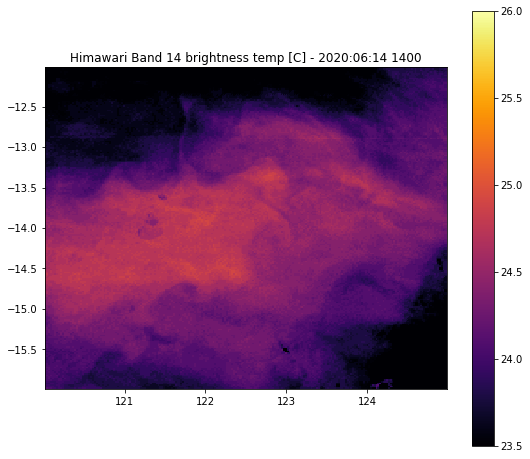

In [29]:

plt.figure(figsize=(9,8))
plt.pcolormesh(x,y,mydata.squeeze()-273.15, vmin=23.5,vmax=26, cmap='inferno')
plt.colorbar()
plt.gca().set_aspect('equal')
plt.title('Himawari Band {} brightness temp [C] - {}:{}:{} {}'.format(band,yyyy,mm,dd,hhmm))
plt.savefig('Himawari_B{}_{}{}{}{}.png'.format(band,yyyy,mm,dd,hhmm), dpi=150)

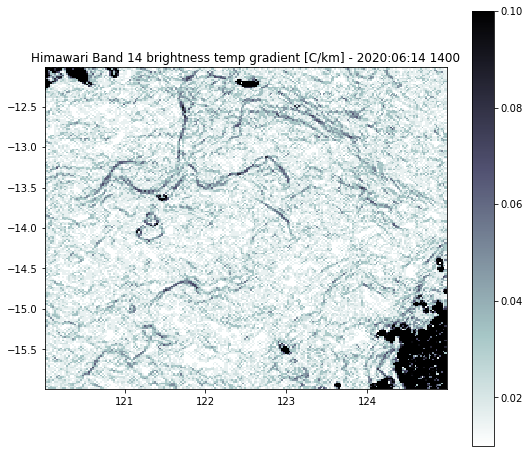

In [30]:
# Compute the gradient and plot
dx = ds.x.values[i1+1]-ds.x.values[i1]

dtdx,dtdy = np.gradient(mydata.squeeze(),dx)

plt.figure(figsize=(9,8))
plt.pcolormesh(x,y,np.abs(dtdx+1j*dtdy)*1e3, vmin=0.01, vmax=0.10, cmap='bone_r')
plt.colorbar()
plt.gca().set_aspect('equal')
plt.title('Himawari Band {} brightness temp gradient [C/km] - {}:{}:{} {}'.format(band,yyyy,mm,dd,hhmm))
plt.savefig('Himawari_B{}_gradient_{}{}{}{}.png'.format(band,yyyy,mm,dd,hhmm), dpi=150)

# Attempt to open multiple opendap files

See:
    https://rabernat.github.io/research_computing_2018/xarray-tips-and-tricks.html
    
    

In [39]:
def get_hw8_ncistr(band, yyyy, mm, dd, hhmm):
    ncipath = 'http://dapds00.nci.org.au/thredds/dodsC/rr5/satellite/obs/himawari8/FLDK/'
    hstr = '00-P1S-ABOM_OBS_B{}-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc'.format(band)

    timestr = '{}/{}/{}/{}/{}{}{}{}{}'.format(yyyy,mm,dd,hhmm,yyyy,mm,dd,hhmm,hstr)
    fullurl = '{}{}'.format(ncipath,timestr)
    return fullurl

In [51]:
t1 = '2020-05-30 00:00:00'
t2 = '2020-06-15 00:00:00'

x1,x2 = 120,125
y1,y2 = -16,-12

band = 14

times = pd.date_range(t1,t2,freq='1H')
url = []
for tt in times:
    hhmm = '%02d00'%(tt.hour)
    url.append(get_hw8_ncistr(band, str(tt.year), '%02d'%(tt.month), '%02d'%(tt.day), hhmm))

In [52]:
dsmf = xr.open_mfdataset(url)
dsmf

/usr/local/bin/start_ipykernel.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/scratch/.local/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


<xarray.Dataset>
Dimensions:                              (time: 385, x: 5500, y: 5500)
Coordinates:
  * y                                    (y) float64 5.499e+06 ... -5.499e+06
  * x                                    (x) float64 -5.499e+06 ... 5.499e+06
  * time                                 (time) datetime64[ns] 2020-05-30 ... 2020-06-15
Data variables:
    geostationary                        (time) float32 9.96921e+36 ... 9.96921e+36
    scan_line_time                       (time, y) datetime64[ns] dask.array<chunksize=(1, 5500), meta=np.ndarray>
    channel_0014_brightness_temperature  (time, y, x) float32 dask.array<chunksize=(1, 5500, 5500), meta=np.ndarray>
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    acknowledgment:                  See disclaimer
    cdm_data_type:                   grid
    comment:                         AGLS observations geometry product
    contributor_name:                Commonwealth of Australia, Bureau of Met...
    contributor_role:                Development; Operations
    creator_email:                   sat_support@bom.gov.au
    creator_name:                    Commonwealth of Australia, Bureau of Met...
    creator_url:                     http://www.bom.gov.au/satellite/
    disclaimer:                      You have requested that the Bureau of Me...
    geospatial_lat_resolution:       0.02
    geospatial_lat_units:            degree_north
    geospatial_lon_resolution:       0.02
    geospatial_lon_units:            degree_east
    geospatial_vertical_max:         0
    geospatial_vertical_min:         0
    geospatial_vertical_positive:    up
    geospatial_vertical_resolution:  0
    geospatial_vertical_units:       m
    institution:                     ABOM
    instrument:                      AHI
    keywords:                        EARTH SCIENCE
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    license:                         See disclaimer
    naming_authority:                au.gov.bom
    processing_level:                L2
    product_specification:           AGLS-OBS_data-product-specification_rev0...
    product_suite:                   OBS_B14
    project:                         AGLS
    publisher_email:                 sat_support@bom.gov.au
    publisher_name:                  Commonwealth of Australia, Bureau of Met...
    publisher_url:                   http://www.bom.gov.au/satellite/
    references:                      AGLS observations product
    standard_name_vocabulary:        CF-1.6
    summary:                         AGLS observations product
    time_coverage_duration:          P1S
    time_coverage_resolution:        P1S
    title:                           AGLS observations product suite
    wmo_instrument_name:             Advanced Himawari Imager
    wmo_instrument_type:             297
    wmo_satellite_series:            273
    date_created:                    20200530T000003Z
    history:                         saturnc
    id:                              ABOM_AGLS_OBS_B14_P1S_GRID_v1.1
    netCDF_version:                  4.3.3.1 of Dec 10 2015 16:44:18 $
    processing_version:              1.1
    uuid:                            9064f8bf-67f2-4583-9efb-f0bdd9025342
    geospatial_lat_max:              81.13851
    geospatial_lat_min:              -81.13851
    geospatial_lon_max:              221.89696
    geospatial_lon_min:              59.50304
    platform:                        Himawari-8
    platform_launch_date:            20141007T051600Z
    time_coverage_end:               20200530T000941Z
    time_coverage_start:             20200530T000021Z
    wmo_platform_name:               Himawari-8
    wmo_satellite_number:            173

In [53]:
P = Proj(ds.geostationary.proj4, init=None)

lon,lat = P(ds.x.values, ds.y.values, inverse=True)
lon[lon>1e10] = np.nan
lat[lat>1e10] = np.nan

i1 = np.argwhere(lon>x1)[0,0]
i2 = np.argwhere(lon>x2)[0,0]
j1 = np.argwhere(lat<y1)[0,0]
j2 = np.argwhere(lat<y2)[0,0]

x = lon[i1:i2]
y = lat[j2:j1]

# Subset the data and assign lat/lon values to the x/y coordinates
myds = dsmf.isel(x=slice(i1,i2), y=slice(j2,j1)).assign_coords({'x':x, 'y':y})

myds

/usr/local/bin/start_ipykernel.py:7: RuntimeWarning: invalid value encountered in greater
/usr/local/bin/start_ipykernel.py:8: RuntimeWarning: invalid value encountered in greater
/usr/local/bin/start_ipykernel.py:9: RuntimeWarning: invalid value encountered in less
/usr/local/bin/start_ipykernel.py:10: RuntimeWarning: invalid value encountered in less


<xarray.Dataset>
Dimensions:                              (time: 385, x: 217, y: 207)
Coordinates:
  * y                                    (y) float64 -12.01 -12.03 ... -16.0
  * x                                    (x) float64 120.0 120.0 ... 125.0 125.0
  * time                                 (time) datetime64[ns] 2020-05-30 ... 2020-06-15
Data variables:
    geostationary                        (time) float32 9.96921e+36 ... 9.96921e+36
    scan_line_time                       (time, y) datetime64[ns] dask.array<chunksize=(1, 207), meta=np.ndarray>
    channel_0014_brightness_temperature  (time, y, x) float32 dask.array<chunksize=(1, 207, 217), meta=np.ndarray>
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    acknowledgment:                  See disclaimer
    cdm_data_type:                   grid
    comment:                         AGLS observations geometry product
    contributor_name:                Commonwealth of Australia, Bureau of Met...
    contributor_role:                Development; Operations
    creator_email:                   sat_support@bom.gov.au
    creator_name:                    Commonwealth of Australia, Bureau of Met...
    creator_url:                     http://www.bom.gov.au/satellite/
    disclaimer:                      You have requested that the Bureau of Me...
    geospatial_lat_resolution:       0.02
    geospatial_lat_units:            degree_north
    geospatial_lon_resolution:       0.02
    geospatial_lon_units:            degree_east
    geospatial_vertical_max:         0
    geospatial_vertical_min:         0
    geospatial_vertical_positive:    up
    geospatial_vertical_resolution:  0
    geospatial_vertical_units:       m
    institution:                     ABOM
    instrument:                      AHI
    keywords:                        EARTH SCIENCE
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    license:                         See disclaimer
    naming_authority:                au.gov.bom
    processing_level:                L2
    product_specification:           AGLS-OBS_data-product-specification_rev0...
    product_suite:                   OBS_B14
    project:                         AGLS
    publisher_email:                 sat_support@bom.gov.au
    publisher_name:                  Commonwealth of Australia, Bureau of Met...
    publisher_url:                   http://www.bom.gov.au/satellite/
    references:                      AGLS observations product
    standard_name_vocabulary:        CF-1.6
    summary:                         AGLS observations product
    time_coverage_duration:          P1S
    time_coverage_resolution:        P1S
    title:                           AGLS observations product suite
    wmo_instrument_name:             Advanced Himawari Imager
    wmo_instrument_type:             297
    wmo_satellite_series:            273
    date_created:                    20200530T000003Z
    history:                         saturnc
    id:                              ABOM_AGLS_OBS_B14_P1S_GRID_v1.1
    netCDF_version:                  4.3.3.1 of Dec 10 2015 16:44:18 $
    processing_version:              1.1
    uuid:                            9064f8bf-67f2-4583-9efb-f0bdd9025342
    geospatial_lat_max:              81.13851
    geospatial_lat_min:              -81.13851
    geospatial_lon_max:              221.89696
    geospatial_lon_min:              59.50304
    platform:                        Himawari-8
    platform_launch_date:            20141007T051600Z
    time_coverage_end:               20200530T000941Z
    time_coverage_start:             20200530T000021Z
    wmo_platform_name:               Himawari-8
    wmo_satellite_number:            173

In [54]:
%%time
myds.to_netcdf('cloudstor/Data/himawari_sst/hw8_single_band_nci_MayJune2020_example.nc')
print('Done')

Done
CPU times: user 12.4 s, sys: 5.6 s, total: 17.9 s
Wall time: 3min 6s
